<a href="https://colab.research.google.com/github/pnnato/image_analysis/blob/master/yolo_by_kriyeng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. You can access to your Drive files 
# using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
#!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

/content/gdrive/My Drive/darknet
3rdparty		      darknet		       obj.names
appveyor.yml		      darknet19_448.conv.23    predictions.jpg
backup			      darknet19.cfg	       process.py
bad.list		      darknet19.conv.15        README.md
build			      darknet19.weights        results
build.ps1		      darknet53.conv.74        scripts
build.sh		      DarknetConfig.cmake.in   src
cfg			      darknet.py	       test.txt
chart_6000.png		      darknet_video.py	       train.txt
chart.png		      data		       video_v2.sh
chart_yolov2_2000_online.png  image_yolov2.sh	       video_yolov3.sh
chart_yolov2_8000_online.png  image_yolov3.sh	       yolov2.cfg
chart-yolov2.png	      img		       yolov2-tiny.conv.15
chart-yolov2-tiny-online.png  include		       yolov2-tiny-flower.cfg
chart-yolov2-tiny.png	      json_mjpeg_streams.sh    yolov2-tiny.weights
chart-yolov3-online.png       LICENSE		       yolov3.cfg
chart-yolov3.png	      Makefile		       yolov3-tiny.conv.15
chart-yolov3-tiny-online.png  net_cam_v3

In [0]:
# I have a branch where I have done the changes commented above
#!git checkout feature/google-colab
#Compile Darknet
#!make
!chmod +x ./darknet

In [0]:
#!sudo apt-get install tree

In [0]:
#!tree /content/gdrive/My\ Drive/Colab\ Notebooks/darknet/

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# Not necessary cell
# Get yolov3 weights
#!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [0]:
!python process.py

In [0]:
!./darknet partial yolov2-tiny-flower.cfg yolov2-tiny-voc.weights yolov2-tiny.conv.15 15
#!./darknet partial darknet19.cfg darknet19.weights darknet19.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   640 x 480 x   3   ->   640 x 480 x  16 0.265 BF
   1 max          2 x 2 / 2   640 x 480 x  16   ->   320 x 240 x  16 0.005 BF
   2 conv     32  3 x 3 / 1   320 x 240 x  16   ->   320 x 240 x  32 0.708 BF
   3 max          2 x 2 / 2   320 x 240 x  32   ->   160 x 120 x  32 0.002 BF
   4 conv     64  3 x 3 / 1   160 x 120 x  32   ->   160 x 120 x  64 0.708 BF
   5 max          2 x 2 / 2   160 x 120 x  64   ->    80 x  60 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    80 x  60 x  64   ->    80 x  60 x 128 0.708 BF
   7 max          2 x 2 / 2    80 x  60 x 128   ->    40 x  30 x 128 0.001 BF
   8 conv    256  3 x 3 / 1    40 x  30 x 128   ->    40 x  30 x 256 0.708 BF
   9 max          2 x 2 / 2    40 x  30 x 256   ->    20 x  15 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    20 x  15 x 256   ->    20 x  15 x 512 0.708 BF
  11 max          2 x 2 / 1    20 x  15 x 512   ->    20 x  15 x 512 0.001 

In [0]:
!./darknet detector train obj_flower.data yolov3.cfg backup/yolov3_2000.weights -dont_show

yolov3
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   640 x 480 x   3   ->   640 x 480 x  32 0.531 BF
   1 conv     64  3 x 3 / 2   640 x 480 x  32   ->   320 x 240 x  64 2.831 BF
   2 conv     32  1 x 1 / 1   320 x 240 x  64   ->   320 x 240 x  32 0.315 BF
   3 conv     64  3 x 3 / 1   320 x 240 x  32   ->   320 x 240 x  64 2.831 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   320 x 240 x  64   ->   160 x 120 x 128 2.831 BF
   6 conv     64  1 x 1 / 1   160 x 120 x 128   ->   160 x 120 x  64 0.315 BF
   7 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   160 x 120 x 128   ->   160 x 120 x  64 0.315 BF
  10 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   160 x 120 x 128   ->    80 x  60 x 256 2.831 BF
  13 conv    128  1 x 1 / 1    80 x  60 x 256   ->    80 x  60 x 128 0.315 BF

In [0]:
!./darknet detect yolov2-tiny-flower.cfg backup/yolov2-tiny-flower_10000.weights data/flower/flower-7.jpg
imShow('predictions.jpg')

In [0]:
!./darknet detector test obj_flower.data yolov2-tiny-flower.cfg backup/yolov2-tiny-flower_9000.weights

In [0]:
!./darknet detector map obj_flower.data yolov2.cfg backup/yolov2-2/yolov2_8000.weights

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   640 x 480 x   3   ->   640 x 480 x  32 0.531 BF
   1 max          2 x 2 / 2   640 x 480 x  32   ->   320 x 240 x  32 0.010 BF
   2 conv     64  3 x 3 / 1   320 x 240 x  32   ->   320 x 240 x  64 2.831 BF
   3 max          2 x 2 / 2   320 x 240 x  64   ->   160 x 120 x  64 0.005 BF
   4 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
   5 conv     64  1 x 1 / 1   160 x 120 x 128   ->   160 x 120 x  64 0.315 BF
   6 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
   7 max          2 x 2 / 2   160 x 120 x 128   ->    80 x  60 x 128 0.002 BF
   8 conv    256  3 x 3 / 1    80 x  60 x 128   ->    80 x  60 x 256 2.831 BF
   9 conv    128  1 x 1 / 1    80 x  60 x 256   ->    80 x  60 x 128 0.315 BF
  10 conv    256  3 x 3 / 1    80 x  60 x 128   ->    80 x  60 x 256 2.831 BF
  11 max          2 x 2 / 2    80 x  60 x 256   ->    40 x  30 x 256 0.001 

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   640 x 480 x   3   ->   640 x 480 x  32 0.531 BF
   1 conv     64  3 x 3 / 2   640 x 480 x  32   ->   320 x 240 x  64 2.831 BF
   2 conv     32  1 x 1 / 1   320 x 240 x  64   ->   320 x 240 x  32 0.315 BF
   3 conv     64  3 x 3 / 1   320 x 240 x  32   ->   320 x 240 x  64 2.831 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   320 x 240 x  64   ->   160 x 120 x 128 2.831 BF
   6 conv     64  1 x 1 / 1   160 x 120 x 128   ->   160 x 120 x  64 0.315 BF
   7 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   160 x 120 x 128   ->   160 x 120 x  64 0.315 BF
  10 conv    128  3 x 3 / 1   160 x 120 x  64   ->   160 x 120 x 128 2.831 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   160 x 120 x 128   ->    80 x  60 x 256 2.831 BF
  13 conv    128  1 x 1 / 1    80 x  60 x 256   ->    80 x  60 x 128 0.315 BF
  14 c

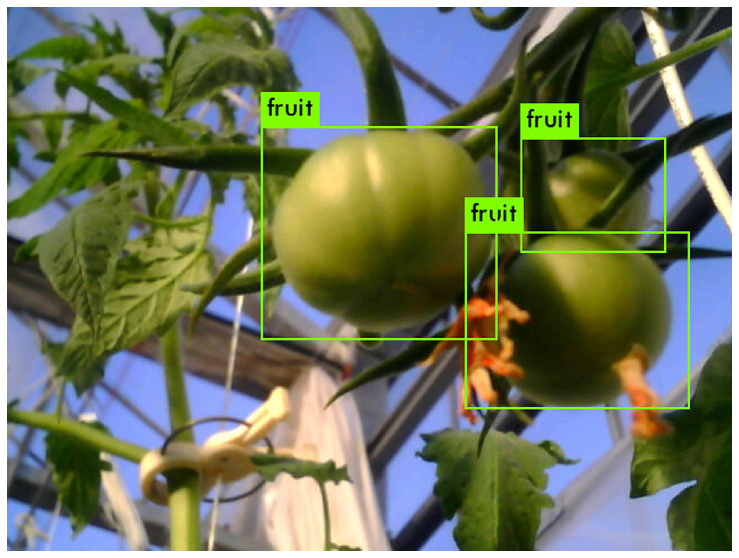

In [0]:
!./darknet detect yolov3.cfg backup/yolov3/yolov3_4000.weights data/flower/fruit-109.jpg
imShow('predictions.jpg')

In [0]:
!./darknet detector train obj_flower_darknet.data darknet19.cfg darknet19.weights -dont_show